# Build Graph using TF-IDF

## imports 

In [2]:
import json

import numpy as np
import pandas as pd

import scipy.sparse as sp
from math import log
from scipy.spatial.distance import cosine

## data load

In [4]:
%%time

data_path = '../../data/summary/data/train.json'
with open(data_path, 'r', encoding='utf8') as f:
    data = [json.loads(line) for line in f]

Wall time: 4.31 s


In [7]:
sample = data[1]

text = sample['doc']
labels = sample['labels']
summary = sample['summaries']

In [8]:
sentences = text.split('\n')

In [10]:
# sentences

## build graph using TF-IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
tfidf = TfidfVectorizer().fit(sentences)

In [32]:
tdm = tfidf.transform(sentences).toarray()

## cosine similarity matrix

In [33]:
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

In [34]:
cosine_matrix = 1 - pairwise_distances(tdm, metric="cosine")

In [35]:
cosine_matrix

array([[1.        , 0.13609194, 0.12618777, ..., 0.02022491, 0.02186457,
        0.1313864 ],
       [0.13609194, 1.        , 0.12350045, ..., 0.03251912, 0.05895499,
        0.1142939 ],
       [0.12618777, 0.12350045, 1.        , ..., 0.03105751, 0.0768713 ,
        0.11738449],
       ...,
       [0.02022491, 0.03251912, 0.03105751, ..., 1.        , 0.04669969,
        0.        ],
       [0.02186457, 0.05895499, 0.0768713 , ..., 0.04669969, 1.        ,
        0.02290561],
       [0.1313864 , 0.1142939 , 0.11738449, ..., 0.        , 0.02290561,
        1.        ]])

## adjacency matrix using threshold

In [44]:
threshold = 0.15

adj_matrix = (cosine_matrix > threshold) * 1

## create Graph using Networkx

In [45]:
%matplotlib inline

import networkx as nx

import matplotlib.pyplot as plt

In [46]:
G = nx.from_numpy_matrix(adj_matrix)

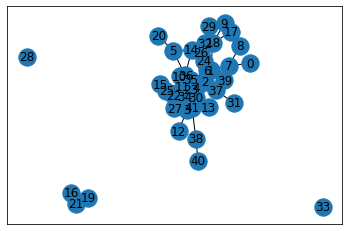

In [47]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='black', arrows=False)
plt.show()

In [48]:
G.degree

DegreeView({0: 3, 1: 6, 2: 7, 3: 6, 4: 15, 5: 5, 6: 7, 7: 6, 8: 4, 9: 4, 10: 5, 11: 10, 12: 3, 13: 3, 14: 7, 15: 4, 16: 3, 17: 5, 18: 9, 19: 3, 20: 3, 21: 4, 22: 4, 23: 12, 24: 5, 25: 4, 26: 5, 27: 3, 28: 2, 29: 4, 30: 6, 31: 3, 32: 6, 33: 2, 34: 5, 35: 7, 36: 7, 37: 6, 38: 4, 39: 4, 40: 3, 41: 6})

In [64]:
labels = labels.split('\n')